In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

/home/grigoriy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/grigoriy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/grigoriy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/grigoriy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

1.5.0


## Использование линейной регресии для классификации

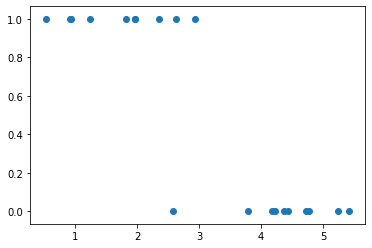

In [2]:
# Синтетический датасет
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)
plt.scatter(xs, labels)
plt.show()

In [3]:
tf.reset_default_graph()

In [4]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder('float')
Y = tf.placeholder('float')

def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), #y = w1 * x + w0 
                  tf.multiply(w[0], tf.pow(X, 0)))

w = tf.Variable([0., 0.], name = 'parameters')
y_model = model(X, w)

cost = tf.reduce_sum(tf.square(Y - y_model)) #SE
# Adding /len(xs) and transforming SE to MSE make situation warse. Why?
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: xs, Y: labels})
        current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
        if epoch % 100 == 0:
            print(epoch, current_cost)
    w_val = sess.run(w)
    print('Learned parameters:', w_val)

0 8.778662
100 2.8276067
200 1.5890565
300 1.313977
400 1.2528824
500 1.2393132
600 1.2362996
700 1.2356303
800 1.2354815
900 1.2354486
Learned parameters: [ 1.3657527  -0.28380704]


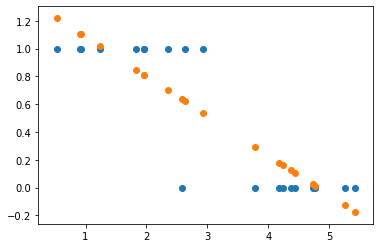

In [5]:
y_pred = w_val[1] * xs + w_val[0]
plt.scatter(xs, labels)
plt.scatter(xs, y_pred)
plt.show()

In [6]:
correct_prediction = (labels==(y_pred > 0.5))
print('Accuracy:', np.mean(correct_prediction))

Accuracy: 0.95


Выглядит привлекательно. Но теперь добавим выброс

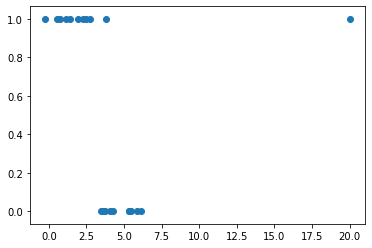

In [41]:
# Синтетический датасет
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
xs = np.append(xs, np.array([20.]))
labels = [0.] * len(x_label0) + [1.] * (len(x_label1) + 1)
plt.scatter(xs, labels)
plt.show()

In [42]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder('float')
Y = tf.placeholder('float')

def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), #y = w1 * x + w0 
                  tf.multiply(w[0], tf.pow(X, 0)))

w = tf.Variable([0., 0.], name = 'parameters')
y_model = model(X, w)

cost = tf.reduce_sum(tf.square(Y - y_model)) #SE
# Adding /len(xs) and transforming SE to MSE make situation warse. Why?
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: xs, Y: labels})
        current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
        if epoch % 100 == 0:
            print(epoch, current_cost)
    w_val = sess.run(w)
    print('Learned parameters:', w_val)

0 9.040353
100 5.1353273
200 5.0801687
300 5.079328
400 5.0793157
500 5.0793157
600 5.079315
700 5.079315
800 5.079315
900 5.079315
Learned parameters: [ 0.61063814 -0.02168923]


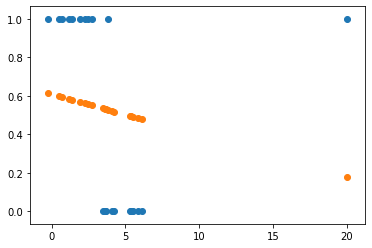

In [43]:
y_pred = w_val[1] * xs + w_val[0]
plt.scatter(xs, labels)
plt.scatter(xs, y_pred)
plt.show()

In [44]:
correct_prediction = (labels==(y_pred > 0.5))
print('Accuracy:', np.mean(correct_prediction))

Accuracy: 0.7142857142857143


In [ ]:
# correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
# accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

# init = tf.global_variables_initializer()
# with tf.Session() as sess:
#     sess.run(init)
#     print('Predicted labels', sess.run(correct_prediction, feed_dict={X: xs, Y: labels}))
#     print('Accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

Линейная регрессия не подходит для задач классификации, так как слишком чувствительна к выбросам. Да и аппроксимирует крайне слабо.

## Использование логистической регресии

In [7]:
tf.reset_default_graph()

In [8]:
learning_rate = 0.01
training_epochs = 10000

X = tf.placeholder('float')
Y = tf.placeholder('float')

def model(X, w):
    return tf.sigmoid(tf.add(tf.multiply(w[1], tf.pow(X, 1)), #y = w1 * x + w0 
                  tf.multiply(w[0], tf.pow(X, 0))))

w = tf.Variable([0., 0.], name = 'parameters')
y_model = model(X, w)

cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        _, curr_cost = sess.run([train_op, cost], feed_dict={X: xs, Y: labels})
#         current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
        if epoch % 1000 == 0:
            print(epoch, curr_cost)
    w_val = sess.run(w)
    print('Learned parameters:', w_val)

0 0.6931472
1000 0.42539486
2000 0.33357778
3000 0.28367695
4000 0.25279313
5000 0.23190549
6000 0.21687725
7000 0.20556839
8000 0.19676535
9000 0.18972991
Learned parameters: [ 5.3038754 -1.8148386]


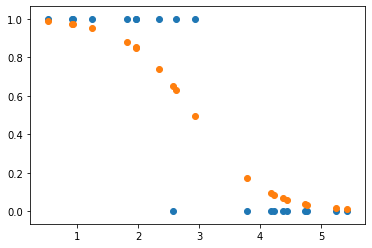

In [9]:
def np_sigmoid(x):
    return 1. / (1 + np.exp(-x))

y_pred = np_sigmoid(w_val[1] * xs + w_val[0])
plt.scatter(xs, labels)
plt.scatter(xs, y_pred)
plt.show()

In [10]:
correct_prediction = (labels==(y_pred > 0.5))
print('Accuracy:', np.mean(correct_prediction))

Accuracy: 0.9


## Многоклассовая логистическая регресия

In [45]:
tf.reset_default_graph()

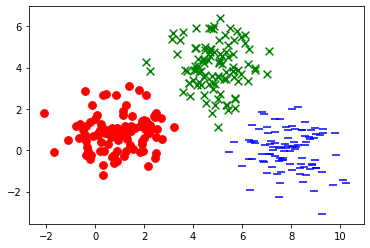

In [46]:
learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()


In [47]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))

xs = np.vstack((xs_label0, xs_label1, xs_label2))
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

In [48]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

In [49]:
train_size, num_features = xs.shape

X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [50]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        if step % 100 == 0:
            print (step, err)

    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))

0 109.8612
100 5.6440163
200 4.3954983
300 2.7091203
400 3.4475286
500 2.7647781
600 1.8735796
700 3.0108507
800 2.1746705
900 1.506645
1000 2.7787771
1100 1.8489639
1200 1.2936009
1300 2.6164894
1400 1.6375971
1500 1.1524551
1600 2.487459
1700 1.4876323
1800 1.0512116
1900 2.3774412
2000 1.3748779
2100 0.97454196
2200 2.2796946
2300 1.2864959
2400 0.9140991
2500 2.1906087
2600 1.2149495
2700 0.8649298
2800 2.1080892
2900 1.1554955
w [[-2.4819832   0.16615823  2.3158116 ]
 [ 0.10391591  2.6411617  -2.7450843 ]]
b [10.49748   -3.4386156 -7.0588584]
accuracy 1.0
